<a href="https://colab.research.google.com/github/servetgulnaroglu/Forecasting/blob/main/notebooks/transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Pretrained Models:</font>
### <font color='#475468'> Can you speed up your efforts using pretrained models?</font>

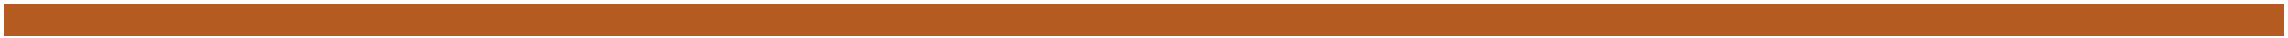

# Transfomers

Pretrained chains of models that perform specific tasks

## Initialize

In [1]:
!pip install transformers

In [2]:
# Use pipelines to access pre-trained models
from transformers import pipeline

## Sentiment Analysis

In [3]:
# Model
mdlSnt = pipeline('sentiment-analysis')

# Parameters
#prmStatement = 'We are happy to go on vacation this spring break.'
prmStatement = ['It is nice to have you here in the US.  I heard the weather is terrible in the UK.',
        'I am struggling with stress']
# Predict
mdlSnt(prmStatement)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.8162758350372314},
 {'label': 'NEGATIVE', 'score': 0.9937747716903687}]

In [17]:
# Model
mdlSnt = pipeline('sentiment-analysis')

# Parameters
#prmStatement = 'We are happy to go on vacation this spring break.'
prmStatement = ['trump got shot, nicee',
                'trump got shot :(',
                'i want to die',
                'i want to die so bad',
                'i want to die so bad, thats the true way of finding the god',
                'i want to die so bad, i believe thats the true way of finding the god',
                'i want to find peace in my thumb, i believe thats the true way of finding the god',
                'do you think trump is going to die',
                'do you think trump is going to die, hopefully',
                'do you think trump is going to live',
                'do you think trump is going to live, unfortunately',
                'do you think trump is going to live, fortunately']
# Predict
mdlSnt(prmStatement)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9942876696586609},
 {'label': 'NEGATIVE', 'score': 0.7431034445762634},
 {'label': 'NEGATIVE', 'score': 0.9984996318817139},
 {'label': 'NEGATIVE', 'score': 0.9997355341911316},
 {'label': 'NEGATIVE', 'score': 0.9996521472930908},
 {'label': 'NEGATIVE', 'score': 0.9995658993721008},
 {'label': 'POSITIVE', 'score': 0.9987726807594299},
 {'label': 'NEGATIVE', 'score': 0.9855477809906006},
 {'label': 'POSITIVE', 'score': 0.5839777588844299},
 {'label': 'POSITIVE', 'score': 0.9980085492134094},
 {'label': 'NEGATIVE', 'score': 0.9949691891670227},
 {'label': 'POSITIVE', 'score': 0.9977442026138306}]

Can perform sentiment analysis in other languages as well using `model = 'nlptown/bert-base-multilingual-uncased-sentiment'`

In [18]:
# Model
mdlSnt = pipeline('sentiment-analysis', model = 'nlptown/bert-base-multilingual-uncased-sentiment')

# Parameters
prmStatement = 'hace mucho calor' #spanish for: the weather is very hot

# Predict
mdlSnt(prmStatement)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': '2 stars', 'score': 0.2787253260612488}]

The result is in stars as opposed to score... this is as per the model definition.  See model details in HF for more details.

## Question Answering

### Example 1

In [24]:
# Model
mdlQa = pipeline("question-answering")

# Parameters
# f = open("/content/drive/MyDrive/Colab Notebooks/data/hf.txt", "r")

context = """
Quantum physics, also known as quantum mechanics, is a fundamental theory in physics that describes the nature and behavior of matter and energy at the most fundamental level. Unlike classical physics, which works well for explaining phenomena on a macroscopic scale, quantum physics operates on the microscopic scale of atoms and subatomic particles.

Core Principles of Quantum Physics
Wave-Particle Duality: One of the most surprising aspects of quantum physics is that particles, such as electrons and photons, exhibit both wave-like and particle-like properties. This duality means that particles can interfere and diffract like waves but also can be counted and can collide like particles.

Quantization: In the quantum world, certain properties, such as energy, are quantized. This means that particles can only possess certain discrete values of energy. The quantization of energy levels is crucial for understanding atomic and molecular spectra.

Superposition: Quantum systems can exist in multiple states simultaneously. For example, an electron can exist in a superposition of different energy levels or spatial locations until it is observed. This principle is famously illustrated by Schrödinger's cat, a thought experiment in which a cat in a box can be simultaneously alive and dead until observed.

Entanglement: When particles become entangled, the state of one particle is directly related to the state of another, no matter how far apart they are. This connection is instantaneous and occurs faster than the speed of light, leading to what Einstein referred to as "spooky action at a distance."

Uncertainty Principle: Formulated by Werner Heisenberg, the uncertainty principle states that certain pairs of properties, like position and momentum, cannot both be precisely measured simultaneously. The more accurately one property is measured, the less accurately the other can be known.

Key Experiments and Theories
Double-Slit Experiment: This experiment demonstrates the wave-particle duality of particles like electrons and photons. When particles pass through two closely spaced slits, they create an interference pattern on a screen, indicating wave-like behavior. However, if one tries to measure which slit the particle goes through, it behaves like a particle.

Schrödinger's Cat: This thought experiment illustrates the concept of superposition and the problem of measurement in quantum mechanics. It involves a cat that is simultaneously alive and dead until an observer opens the box and checks.

Bell's Theorem: This theorem, formulated by physicist John Bell, showed that the predictions of quantum mechanics are not compatible with the idea of local hidden variables, reinforcing the concept of entanglement.

Applications of Quantum Physics
Quantum physics is not just a theoretical endeavor; it has practical applications that are transforming technology:

Quantum Computing: Quantum computers use qubits, which can be in superpositions of states, allowing them to perform certain types of calculations much more efficiently than classical computers.

Quantum Cryptography: This technology leverages the principles of quantum mechanics to create secure communication channels that are theoretically immune to eavesdropping.

Quantum Teleportation: Although not teleportation in the science fiction sense, this process involves transferring the state of a particle to another particle at a distant location through entanglement.

Medical Imaging and Sensing: Quantum principles are applied in technologies like MRI and in the development of highly sensitive sensors for detecting minute changes in physical quantities.
"""

# Conclusion
# Quantum physics has fundamentally changed our understanding of the universe. It reveals a world that is counterintuitive and profoundly different from our everyday experiences. The principles of quantum mechanics are not only key to understanding the microscopic world but also hold the promise of revolutionizing technology and industry in the coming years.
# context = f.read()
#context = "Hugging Face, Inc. is an American company that develops tools for building applications using machine learning. It is most notable for its Transformers library built for natural language processing applications and its platform that allows users to share machine learning models and datasets. The company was founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf originally as a company that developed a chatbot app targeted at teenagers. After open-sourcing the model behind the chatbot, the company pivoted to focus on being a platform for democratizing machine learning. In March 2021, Hugging Face raised $40 million in a Series B funding round. On April 28, 2021, the company launched the BigScience Research Workshop in collaboration with several other research groups to release an open large language model. In 2022, the workshop concluded with the announcement of BLOOM, a multilingual large language model with 176 billion parameters. On December 21, 2021, the company announced its acquisition of Gradio, a software library used to make interactive browser demos of machine learning models. On May 5, 2022, the company announced its Series C funding round led by Coatue and Sequoia.The company received a $2 billion valuation. On May 13, 2022, the company introduced its Student Ambassador Program to help fulfill its mission to teach machine learning to 5 million people by 2023. On May 26, 2022, the company announced a partnership with Graphcore to optimize its Transformers library for the Graphcore IPU. On August 3, 2022, the company announced the Private Hub, an enterprise version of its public Hugging Face Hub that supports SaaS or on-premise deployment. In February 2023, the company announced partnership with Amazon Web Services (AWS) which would allow Hugging Face's products available to AWS customers to use them as the building blocks for their custom applications. The company also said the next generation of BLOOM will be run on Trainium, a proprietary machine learning chip created by AWS."
question = "What is Quantum Computing?"
# Predict
mdlQa(question = question, context = context)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.5621786117553711,
 'start': 2932,
 'end': 2942,
 'answer': 'use qubits'}

### Example 2

# Generative Pretrained Transformers

## Initialize

In [25]:
!pip install --upgrade pip
!pip install openai==0.28

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install colab-env -qU
import colab_env

Mounted at /content/gdrive


## Question Answering

In [ ]:
import os
import openai

# Set up the OpenAI API client
openai.api_key = os.getenv("OPENAI_API_KEY")

# Set up the model and prompt
model_engine = "gpt-3.5-turbo-instruct"
prompt = "top 10 cities in the world by population?"

# Generate a response
completion = openai.Completion.create(
    engine=model_engine,
    prompt=prompt,
    max_tokens=1024,
    n=1,
    stop=None,
    temperature=0.5,
)

response = completion.choices[0].text
print(response)



1. Tokyo, Japan
2. Delhi, India
3. Shanghai, China
4. Mumbai, India
5. Beijing, China
6. Dhaka, Bangladesh
7. Karachi, Pakistan
8. Istanbul, Turkey
9. Buenos Aires, Argentina
10. Mexico City, Mexico
